<a href="https://kaggle.com/kernels/welcome?src=https://github.com/mayait/ClaseAnalisisDatos/blob/main/python101/EstadisticaDescriptivaPython.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" width=120 /></a>

<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/python101/EstadisticaDescriptivaPython.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width=120 /></a>

In [ ]:
#@title Nombre del estudiante
Estudiante = "" #@param {type:"string"}
Código = "" #@param {type:"string"}

<img src="https://usfq.leanlabs.co/static/img/logo-bp.png" width="200"/>

# **Estadística Descriptiva**

# <center>    </center>


---



## Descripción
Conceptos asociados a la estadística descriptiva implementando Python

## Contenido

* Medidas de Tendencia Central
* Medidas de Dispersión
* Medidas de Posición
* Medidas de Forma
* Distribución Normal
* Covarianza y correlación

## Referencias importantes:
* [Seaborn Charts](https://seaborn.pydata.org/tutorial/distributions.html)
* <a href='https://rdrr.io/cran/ISLR/man/Credit.html'>
  Dataset </a>
* https://storage.googleapis.com/datasets-academy/Credit.csv



## 1. Dataset de Trabajo

**Credit:** conjunto de datos simulados que contiene información sobre diez mil clientes de una entidad financiera

<a href='https://rdrr.io/cran/ISLR/man/Credit.html'>
  Documentación de las variables </a>

**Diccionario de datos**
* ID: Código de identificación del cliente
* Income: Ingresos del cliente en $10,000's
* Limit: Límite de crédito
* Rating: Puntaje crediticio
* Cards: Número de tarjetas de crédito
* Age: Edad en años
* Education: Número de años de educación
* Gender: Masculino (Male) o Femenino (Female)
* Student: Si el cliente es estudiantes (Yes) o no lo es (No)
* Married: Si el cliente está casado (Yes) o no está (No)
* Ethnicity: Africano (African), Americano (American), Asiático (Asian) y Caucásico (Caucasian)
* Balance: Promedio del saldo de la tarjeta de crédito en dólares


In [1]:
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

## Descargando el dataset

In [2]:
!wget https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/python101/data/Credit.csv

--2023-04-11 12:06:25--  https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/python101/data/Credit.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 25386 (25K) [text/plain]
Grabando a: «Credit.csv»

Credit.csv          100%[===================>]  24.79K  --.-KB/s    en 0s      

2023-04-11 12:06:25 (111 MB/s) - «Credit.csv» guardado [25386/25386]



## Importar dataset
pd.read_csv() permite importar un archivo de texto a Pandas

In [3]:
Credit = pd.read_csv("Credit.csv")

In [4]:
Credit.sample(4)

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
311,312,23.375,5429,396,3,57,15,Female,No,Yes,Caucasian,844
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
120,121,27.241,1402,128,2,67,15,Female,No,Yes,Asian,0
358,359,30.111,4336,339,1,81,18,Male,No,Yes,Caucasian,347


In [5]:
# Dimensiones del dataset
print(Credit.shape)

(400, 12)


In [6]:
# Muestra los 20 primeros
Credit.head(20)

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [7]:
Credit["Income"]

0       14.891
1      106.025
2      104.593
3      148.924
4       55.882
        ...   
395     12.096
396     13.364
397     57.872
398     37.728
399     18.701
Name: Income, Length: 400, dtype: float64

In [9]:
print(type(Credit["Income"]))

<class 'pandas.core.series.Series'>


## 2. Medidas de Tendencia Central

Empezaremos visualizando la distribución de los ingresos por medio de un histograma. 

**Ejercicio:** Identificar las características de la distribución.

/var/folders/wc/q11kvwg5611dk6vv_x7d_z2h0000gp/T/ipykernel_67212/3163843925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Credit["Income"],  kde=True)


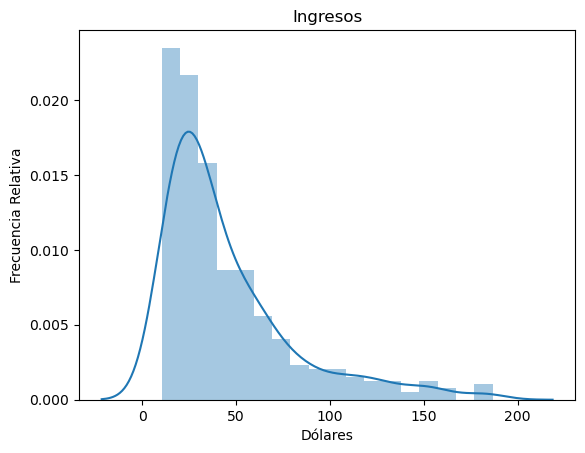

In [10]:
sns.distplot(Credit["Income"],  kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.show()

In [11]:
# Medidas de tendencia central
media    = Credit["Income"].mean()
mediana  = Credit["Income"].median()
moda     = Credit["Income"].mode()

print('Media: ', media, '\nMediana: ', mediana, '\nModa: ', moda[0])

Media:  45.218885 
Mediana:  33.1155 
Moda:  23.793


**¿Cuál de las medidas de tendencia central resumen correctamente a los ingresos?**

/var/folders/wc/q11kvwg5611dk6vv_x7d_z2h0000gp/T/ipykernel_67212/1910420287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Credit["Income"], color ="darkblue", kde=True)


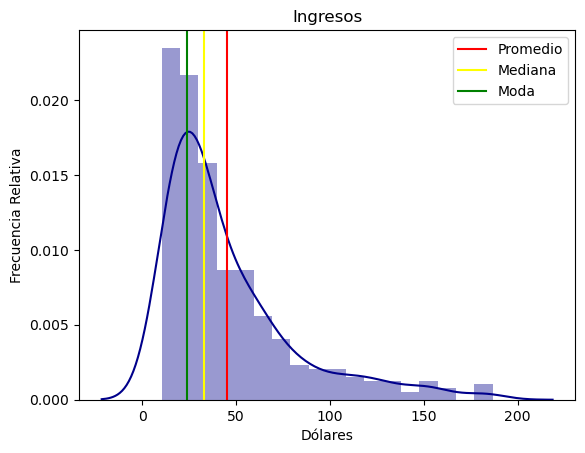

In [12]:
sns.distplot(Credit["Income"], color ="darkblue", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(media, color='red', label='Promedio')
plt.axvline(mediana, color='yellow', label='Mediana')
plt.axvline(moda[0], color='green', label='Moda')
plt.legend()
plt.show()

# 🌶 1
**Ejercicio 1:** Obtener el promedio, mediana y moda de la columna `Limit` del  DataFrame `Credit`


```
Respuesta:
Promedio: 4735.6
Mediana: 4622.5
Moda: 855
```



In [13]:
# Obtener el promedio, mediana y moda de la columna `Limit` del  DataFrame `Credit`
media    = Credit["Limit"].mean()
mediana  = Credit["Limit"].median()
moda     = Credit["Limit"].mode()

print('Media: ', media, '\nMediana: ', mediana, '\nModa: ', moda[0])



Media:  4735.6 
Mediana:  4622.5 
Moda:  855


## 3. Medidas de Dispersión

### Rango

In [14]:
Credit["Income"].min()

10.354

In [15]:
Credit["Income"].max()

186.634

In [16]:
print("El ingreso mínimo es de:", Credit["Income"].min())
print("El ingreso máximo es de:", Credit["Income"].max())
print("El rango es igual a:", Credit["Income"].max() - Credit["Income"].min())

El ingreso mínimo es de: 10.354
El ingreso máximo es de: 186.634
El rango es igual a: 176.27999999999997


### Varianza y Desviación Estándar
* El argumento ```ddof``` hace referencia al denominador: ```N-ddof```
* ```ddof=0``` si trabajamos con la población
* ```ddof=1``` si trabajamos con la muestra

In [17]:
print("La varianza en la población es igual a:", Credit["Income"].var(ddof=0))
print("La desviación estandar en la población es igual a:", Credit["Income"].std(ddof=0))

La varianza en la población es igual a: 1239.0533939567752
La desviación estandar en la población es igual a: 35.20019025455367


In [18]:
print("La varianza en la muestra es igual a:", Credit["Income"].var())
print("La desviación estandar en la muestra es igual a:", Credit["Income"].std())

La varianza en la muestra es igual a: 1242.1587909341104
La desviación estandar en la muestra es igual a: 35.244273165070524


# 🌶 2

---


**Ejercicio 2:** Obtener el rango, la varianza muestral y la desviación estándar muestral de la columna `Balance` del  DataFrame `Credit`


```
Respuesta:
Rango: 1999
Varianza muestral: 211378.22533834586
Desv. estándar muestral: 459.75887738938314
```



In [19]:
# Obtener el rango, la varianza muestral y la desviación estándar muestral de la columna `Balance` del  DataFrame `Credit`

print("El rango es igual a:", Credit["Balance"].max() - Credit["Balance"].min())
print("La varianza en la muestra es igual a:", Credit["Balance"].var())
print("La desviación estandar en la muestra es igual a:", Credit["Balance"].std())



El rango es igual a: 1999
La varianza en la muestra es igual a: 211378.22533834586
La desviación estandar en la muestra es igual a: 459.75887738938314


## 4. Medidas de Posición
El método ```describe()``` muestra de forma predeterminada los cuartiles sin embargo, podemos requerir otras medidas de posición de acuerdo a lo que se necesite.

In [ ]:
Credit["Income"].describe()

In [ ]:
# Percentil 90
Credit["Income"].quantile(0.90)

### Rango Intercuartil (IQR)
Medida de dispersión a ser utilizada cuando se emplea la mediana como medida de tendencia central.
Se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es decir: $$IRQ = Q3 - Q1$$.

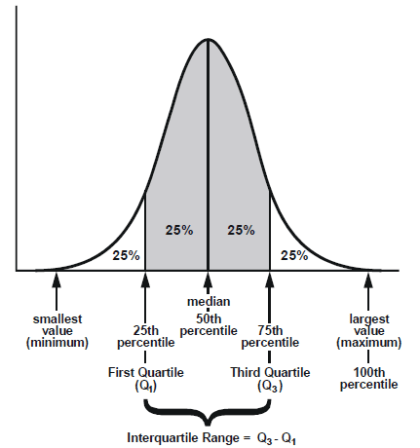

Source:makemeanalyst.com


In [ ]:
stats.iqr(Credit["Income"])

In [ ]:
Credit["Income"].quantile(0.75) - Credit["Income"].quantile(0.25)

## BOX-PLOT :

Un diagrama de caja es una forma muy útil y estandarizada de mostrar la distribución de datos basada en un resumen de cinco números (mínimo, primer cuartil, segundo cuartil (mediana), tercer cuartil, máximo).

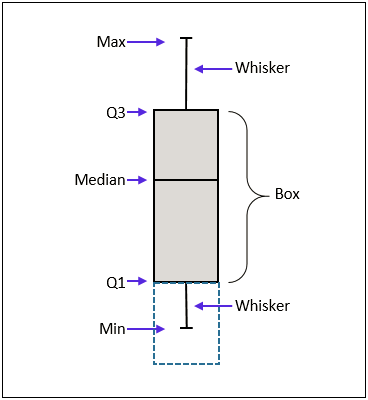

Source: biostats.w.uib.no


In [ ]:
sns.boxplot(x=Credit["Income"],color = "pink") 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.show()

In [ ]:
sns.boxplot(x=Credit["Income"], color="pink") 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")

#Pongamosle las lineas
plt.axvline(Credit["Income"].quantile(0.25), color='green', label='Q1')
plt.axvline(mediana, color='blue', label='Q2/Mediana')
plt.axvline(Credit["Income"].quantile(0.75), color='red', label='Q3')
plt.legend()
plt.show()

In [ ]:
sns.boxplot(x=Credit["Income"], y=Credit["Gender"]) 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.show()

In [ ]:
sns.boxplot(x=Credit["Income"], y=Credit["Ethnicity"]) 
plt.title("Boxplot de los Ingresos por Etnia")
plt.xlabel("Dólares")
plt.show()

### Valores atípicos/extremos/outliers
Se definen como observaciones extremas a aquellas que se encuentran fuera del rango $$[Q_1-(1.5 \times IQR) ; Q_3 +(1.5 \times IQR)]$$

In [ ]:
IQR  = stats.iqr(Credit["Income"])
whis = 1.5
cons = IQR * whis

#Cuartiles
Q1   = Credit["Income"].quantile(0.25)
Q3   = Credit["Income"].quantile(0.75)

print("El límite inferior para valores extremos es:", (Q1-cons))
print("El límite superior para valores extremos es:", (Q3+cons))

In [ ]:
sns.boxplot(x=Credit["Income"], color="pink", whis=1.5) 
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.axvline(Q3+cons, color='blue', label='Lim. Superior')
plt.legend()
plt.show()

In [ ]:
sns.distplot(Credit["Income"], color ="darkblue", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(Q3+cons, color='blue', label='Lim. Superior')
plt.legend()
plt.show()

# 🌶 3
**Ejercicio 3:** Encuentre los quintiles y el rango intercuartil de la columna `Education` del  DataFrame `Credit`


```
Respuesta:
Quintiles: 
0.2    11.0
0.4    13.0
0.6    15.0
0.8    16.0
Name: Education, dtype: float64

IQR Educación: 5.0
```



El límite inferior para valores extremos es: 3.5
El límite superior para valores extremos es: 23.5


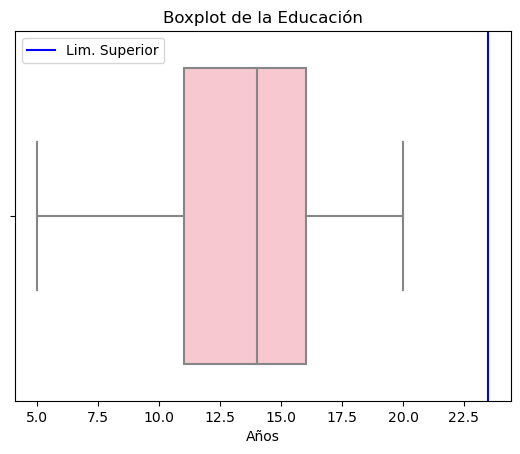

In [21]:
# Encuentre los quintiles y el rango intercuartil de la columna `Education` del  DataFrame `Credit`



## 5. Medidas de Forma
Interprete el coeficiente de asimetría y la curtosis

[Asimentria wikipedia](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica)

[Curtosis wikipedia](https://es.wikipedia.org/wiki/Curtosis)

La asimetría de los datos representa la medida en que los valores de los datos no son simétricos con respecto a la media. Una forma de medir la asimetría es comparando la media y la mediana de la distribución.

*   Mean > Median: Distribución positiva o sesgada a la derecha
*   Mean = Median: Zero skewness o distribución simetrica
*   Mean < Median: Distribución Negativa o sesgada a la izquierda

<img src="https://miro.medium.com/max/1028/1*h5hWyG0USsED8TOOc5D4fA.png">

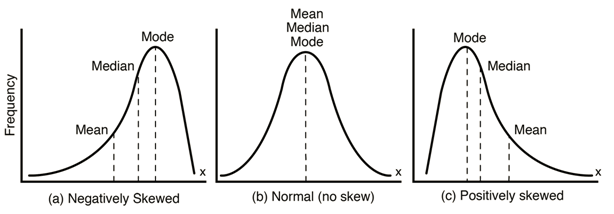

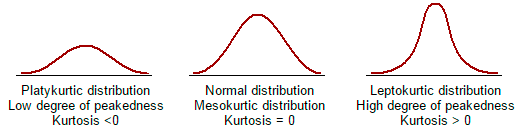

Source : tekmarathon.com



In [ ]:
print("El coeficiente de asimetría es igual a:", Credit["Income"].skew())
print("La curtosis es igual a:", Credit["Income"].kurtosis())

In [ ]:
sns.distplot(Credit["Income"], color="darkred", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(media, color='red', label='Promedio')
plt.axvline(mediana, color='yellow', label='Mediana')
plt.axvline(moda[0], color='green', label='Moda')
plt.legend()
plt.show()

# 🌶 4

Ejercicio 4: Obtenga el coeficiente de asimetría y la curtosis de la columna Rating del DataFrame Credit


```
Respuesta:
Coeficiente de asimetría: 0.8653935227370102
Curtosis: 1.0609469816702823
```



In [ ]:
# Tu magia aquí

## 6. Covarianza y correlación

Analizar las relaciones **lineales** entre dos variables cuantitativas por medio de la covarianza y correlación.

- **Covarianza**: Nos da el signo de la relación entre dos variables, pero no podemos determinar la intensidad en la relación entre las mismas
- **Coeficiente de correlación de Person**: Nos permite entender la relación entre las variables tanto su dirección (signo) e intensidad (valor). Se encuentra entre los valores de -1 y 1

Es importante comprender que la correlación no representa causalidad, analicemos algunos ejemplos: [Correlación Espuria](https://www.tylervigen.com/spurious-correlations)

In [ ]:
# Matriz de varianzas y covarianzas
Credit.cov().round(decimals=2)

A diferencia de la covarianza, el coeficiente de correlación es independiente de la escala y puede tomar un valor entre -1 y +1. Un valor más cercano a -1 indica una correlación negativa entre las variables. Por ejemplo, la correlación entre Rango y Valor es igual a -0,48. Esto indica que a medida que aumenta el Valor, disminuye el Rango (que sería mayor ya que el Rango 1 se considera el más alto).

In [ ]:
# Matriz de correlaciones
Credit.corr().round(decimals=2)

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(Credit.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag_r',);

# Visualizar relaciones estadisticas 


In [ ]:
sns.relplot(x="Age", y="Rating", data=Credit);

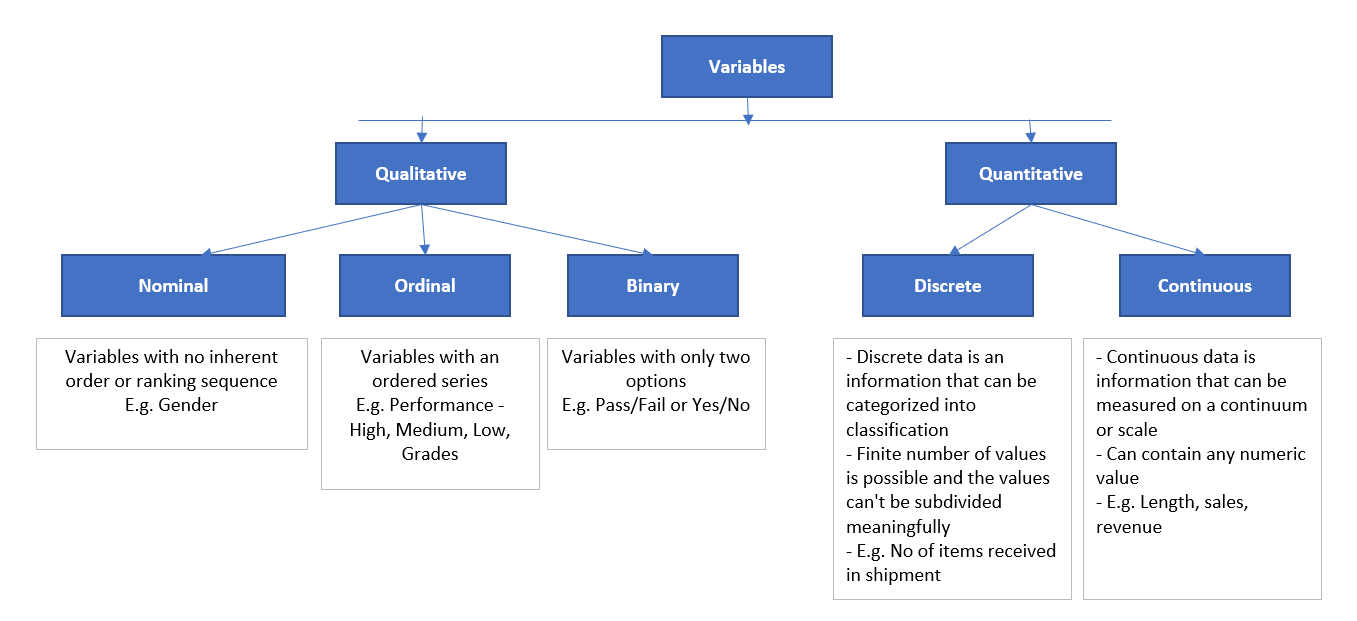